# Logistic Regression - Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\user\Videos/Tutorial/Python/Python for Data Science and Machine Learning Bootcamp/1. Course Introduction/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

<AxesSubplot:>

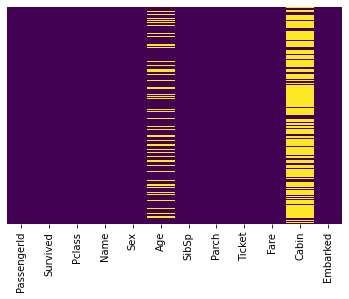

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap ='viridis')

In [15]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

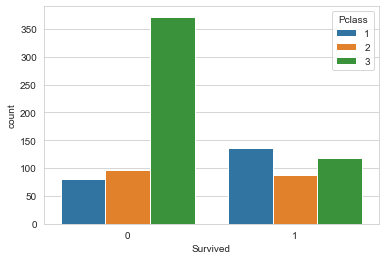

In [29]:
sns.countplot(x ='Survived',data = train, hue = 'Pclass')

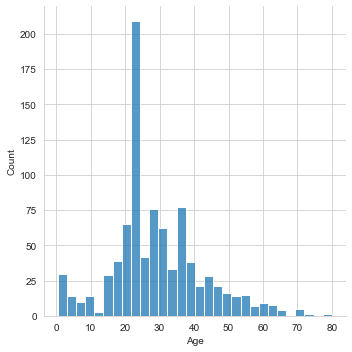

In [172]:
sns.displot(train['Age'].dropna(), bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

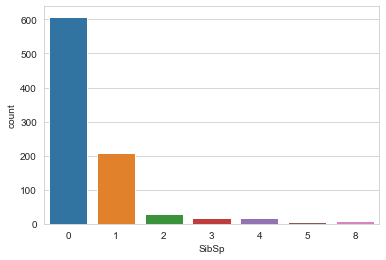

In [171]:
sns.countplot(x = 'SibSp',data = train)

<AxesSubplot:>

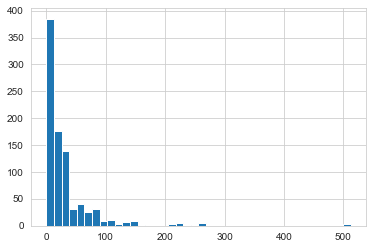

In [34]:
train['Fare'].hist(bins = 40)

### Missing data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

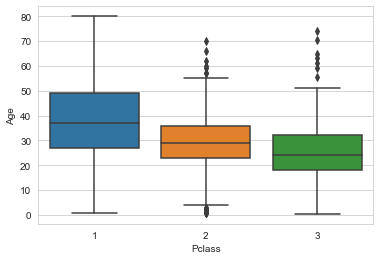

In [41]:
sns.boxplot(y = 'Age',x = 'Pclass', data = train)

In [118]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if  Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [152]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


<AxesSubplot:>

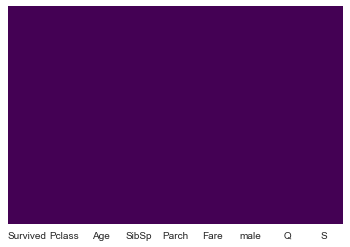

In [123]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap ='viridis')

In [124]:
#Drop column with many missing values

#train.drop('Cabin',axis = 1, inplace = True)
 

<AxesSubplot:>

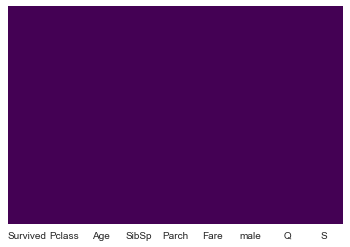

In [125]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap ='viridis')

In [133]:
train.dropna(inplace = True)

In [128]:
#sex =pd.get_dummies(train['Sex'],drop_first=True)
#embark = pd.get_dummies(train['Embarked'],drop_first = True)
 

In [129]:
train = pd.concat([train,sex,embark],axis =1)

In [82]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace= True)

In [87]:
train.drop('PassengerId', axis = 1, inplace =True)

In [141]:
train['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

## Modelling

In [142]:
x = train.drop('Survived', axis = 1)
y = train['Survived']

In [143]:
from sklearn.model_selection  import train_test_split
 

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
logmodel = LogisticRegression()

In [147]:
logmodel.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [154]:
predictions = logmodel.predict(x_test)
  

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [159]:
from sklearn.metrics import confusion_matrix

In [173]:
print(confusion_matrix(y_test,predictions))

[[134  20]
 [ 38  76]]
